In [ ]:
install.packages("arrow")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("stringr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘assertthat’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘mvtnorm’, ‘TH.data’, ‘sandwich’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load necessary libraries
library(arrow)
library(dplyr)
library(ggplot2)
library(stringr)


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘TH.data’


The following object is masked from ‘package:MASS’:

    geyser




In [ ]:
# Read Parquet files
admissions <- read_parquet("admissions.parquet")
patients <- read_parquet("patients.parquet")

In [ ]:
# View the structure of the data
cat("Structure of admissions dataset:\n")
str(admissions)

cat("\nStructure of patients dataset:\n")
str(patients)

# View a summary of the data
cat("\nSummary of admissions dataset:\n")
summary(admissions)

cat("\nSummary of patients dataset:\n")
summary(patients)

Structure of admissions dataset:
tibble [431,231 × 16] (S3: tbl_df/tbl/data.frame)
 $ subject_id          : int [1:431231] 10000032 10000032 10000032 10000032 10000068 10000084 10000084 10000108 10000117 10000117 ...
 $ hadm_id             : int [1:431231] 22595853 22841357 25742920 29079034 25022803 23052089 29888819 27250926 22927623 27988844 ...
 $ admittime           : POSIXct[1:431231], format: "2180-05-06 22:23:00" "2180-06-26 18:27:00" ...
 $ dischtime           : POSIXct[1:431231], format: "2180-05-07 17:15:00" "2180-06-27 18:49:00" ...
 $ deathtime           : POSIXct[1:431231], format: NA NA ...
 $ admission_type      : chr [1:431231] "URGENT" "EW EMER." "EW EMER." "EW EMER." ...
 $ admit_provider_id   : chr [1:431231] "P874LG" "P09Q6Y" "P60CC5" "P30KEH" ...
 $ admission_location  : chr [1:431231] "TRANSFER FROM HOSPITAL" "EMERGENCY ROOM" "EMERGENCY ROOM" "EMERGENCY ROOM" ...
 $ discharge_location  : chr [1:431231] "HOME" "HOME" "HOSPICE" "HOME" ...
 $ insurance           : c

   subject_id          hadm_id           admittime                     
 Min.   :10000032   Min.   :20000019   Min.   :2105-10-04 17:26:00.00  
 1st Qu.:12515570   1st Qu.:22501549   1st Qu.:2135-02-22 13:35:00.00  
 Median :15012885   Median :25006691   Median :2155-01-20 15:22:00.00  
 Mean   :15007665   Mean   :25003138   Mean   :2155-02-27 21:07:41.68  
 3rd Qu.:17496224   3rd Qu.:27504698   3rd Qu.:2175-04-05 03:02:00.00  
 Max.   :19999987   Max.   :29999928   Max.   :2212-04-06 12:13:00.00  
                                                                       
   dischtime                        deathtime                     
 Min.   :2105-10-12 11:11:00.00   Min.   :2110-01-25 09:40:00.00  
 1st Qu.:2135-02-27 14:04:00.00   1st Qu.:2133-06-22 01:37:00.00  
 Median :2155-01-24 16:54:00.00   Median :2153-02-22 19:09:00.00  
 Mean   :2155-03-04 08:43:37.36   Mean   :2153-05-28 01:26:50.18  
 3rd Qu.:2175-04-08 22:41:00.00   3rd Qu.:2173-06-30 06:52:30.00  
 Max.   :2212-04-12 14


Summary of patients dataset:


   subject_id          gender            anchor_age     anchor_year  
 Min.   :10000032   Length:299712      Min.   :18.00   Min.   :2110  
 1st Qu.:12507957   Class :character   1st Qu.:29.00   1st Qu.:2131  
 Median :15014155   Mode  :character   Median :48.00   Median :2151  
 Mean   :15008849                      Mean   :48.54   Mean   :2151  
 3rd Qu.:17504886                      3rd Qu.:65.00   3rd Qu.:2171  
 Max.   :19999987                      Max.   :91.00   Max.   :2208  
                                                                     
 anchor_year_group       dod            
 Length:299712      Min.   :2104-12-24  
 Class :character   1st Qu.:2134-03-22  
 Mode  :character   Median :2153-11-09  
                    Mean   :2154-02-03  
                    3rd Qu.:2174-03-30  
                    Max.   :2212-01-22  
                    NA's   :270636      

In [ ]:
# Display the first few rows of each dataset
cat("\nFirst few rows of admissions dataset:\n")
head(admissions)

cat("\nFirst few rows of patients dataset:\n")
head(patients)


First few rows of admissions dataset:


subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
<int>,<int>,<dttm>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<int>
10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NA,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NA,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NA,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NA,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NA,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NA,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0
10000084,23052089,2160-11-21 01:56:00,2160-11-25 14:52:00,NA,EW EMER.,P6957U,WALK-IN/SELF REFERRAL,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,WHITE,2160-11-20 20:36:00,2160-11-21 03:20:00,0



First few rows of patients dataset:


subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
<int>,<chr>,<int>,<int>,<chr>,<date>
10000032,F,52,2180,2014 - 2016,2180-09-09
10000048,F,23,2126,2008 - 2010,NA
10000068,F,19,2160,2008 - 2010,NA
10000084,M,72,2160,2017 - 2019,2161-02-13
10000102,F,27,2136,2008 - 2010,NA
10000108,M,25,2163,2014 - 2016,NA


In [ ]:
# Calculate Length of Stay (LOS) in days
admissions <- admissions %>%
  mutate(admittime = as.POSIXct(admittime),
         dischtime = as.POSIXct(dischtime),
         LOS = as.numeric(difftime(dischtime, admittime, units = "days")))

In [ ]:
# Merge admissions and patient data
merged_data <- inner_join(admissions, patients, by = "subject_id")

In [ ]:
# Combine similar race groups (e.g., different Hispanic categories)
merged_data <- merged_data %>%
  mutate(race = case_when(
    str_detect(race, "Hispanic") ~ "Hispanic",
    TRUE ~ race  # Leave other races as-is
  ))

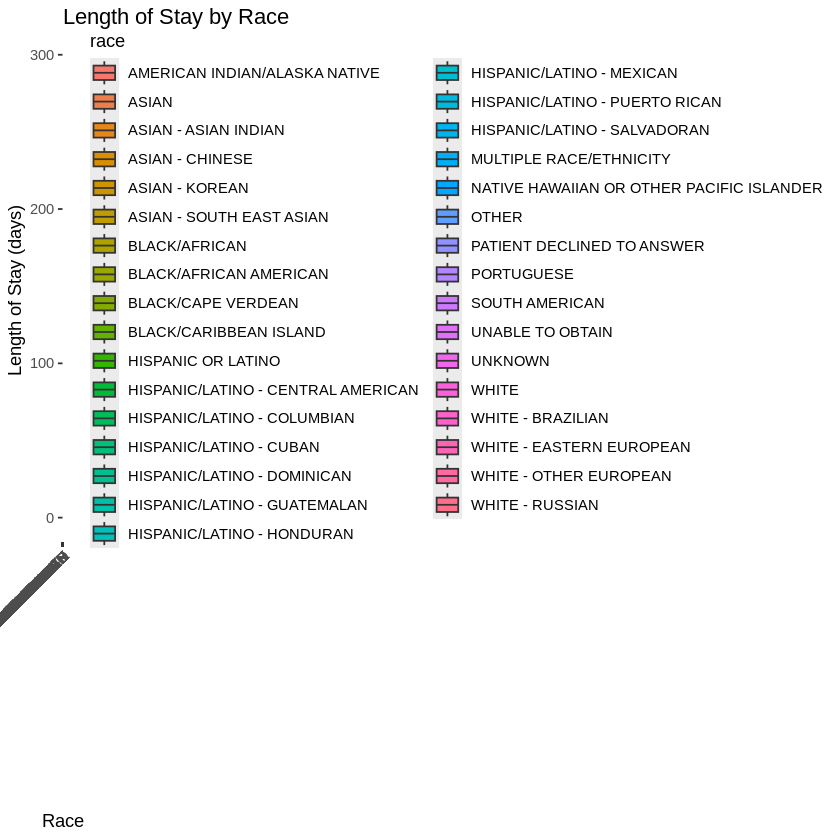

In [ ]:
# Box plot: Race vs LOS
ggplot(merged_data, aes(x = race, y = LOS, fill = race)) +
  geom_boxplot() +
  labs(title = "Length of Stay by Race", x = "Race", y = "Length of Stay (days)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

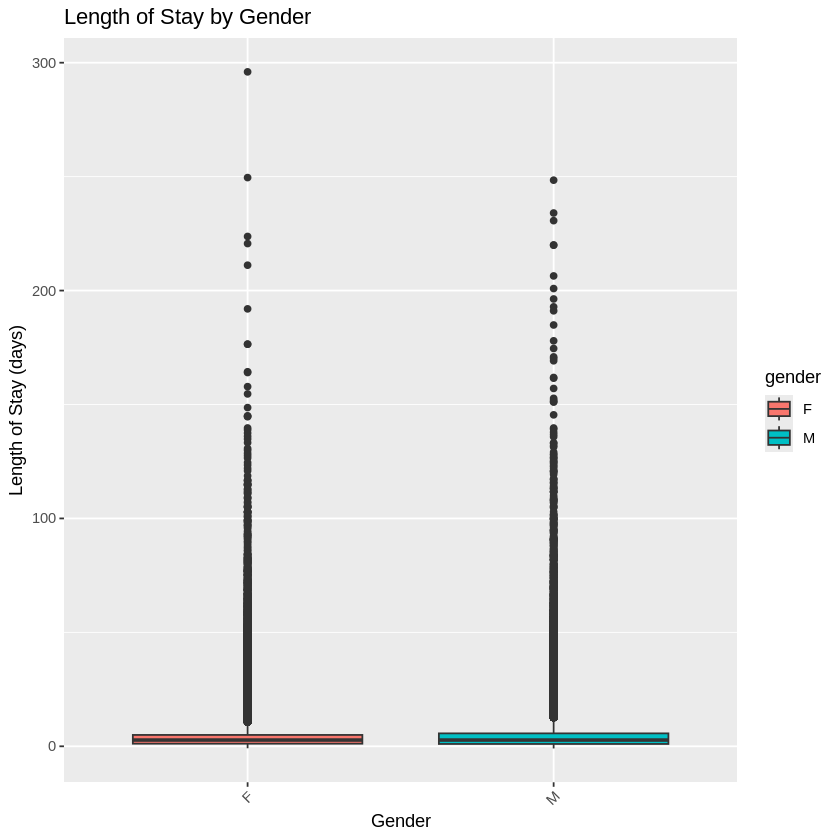

In [ ]:
# Box plot: Gender vs LOS
ggplot(merged_data, aes(x = gender, y = LOS, fill = gender)) +
  geom_boxplot() +
  labs(title = "Length of Stay by Gender", x = "Gender", y = "Length of Stay (days)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [ ]:
# Perform ANOVA for Race
anova_race <- aov(LOS ~ race, data = merged_data)
summary(anova_race)

                Df   Sum Sq Mean Sq F value Pr(>F)    
race            32   134186    4193   96.17 <2e-16 ***
Residuals   431198 18802668      44                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
# Perform ANOVA for Gender
anova_gender <- aov(LOS ~ gender, data = merged_data)
summary(anova_gender)

                Df   Sum Sq Mean Sq F value Pr(>F)    
gender           1    16178   16178   368.7 <2e-16 ***
Residuals   431229 18920676      44                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

From the ANOVA results, I found a significant association between both race and gender with the length of stay (LOS) in the hospital. For race, the p-value (<2e-16) is extremely small, indicating that different racial groups have statistically significant differences in their average length of stay. Similarly, for gender, the p-value (<2e-16) suggests a significant difference in LOS between males and females. This implies that both race and gender play a role in determining how long a patient stays in the hospital.

Question #2

In [ ]:
# Install necessary libraries if not already installed
install.packages("tidyverse")
install.packages("sentimentr")
install.packages("arrow")  # If you need to read Parquet files
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘dtt’, ‘english’, ‘mgsub’, ‘qdapRegex’, ‘slam’, ‘lexicon’, ‘syuzhet’, ‘textclean’, ‘textshape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load necessary libraries
library(tidyverse)
library(sentimentr)
library(arrow)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::duration() masks arrow::duration()
✖ dplyr::filter()       masks stats::filter()
✖ dplyr::lag()          masks stats::lag()
✖ MASS::select()        masks dplyr::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
# Load dataset
discharge_data <- read.csv("discharge_subset.csv")

# Load and process admissions data
admissions <- read_parquet("admissions.parquet")
admissions <- admissions %>%
  mutate(admittime = as.POSIXct(admittime),
         dischtime = as.POSIXct(dischtime),
         LOS = as.numeric(difftime(dischtime, admittime, units = "days")))

# Perform the inner join directly without renaming
merged_data <- inner_join(discharge_data, admissions, by = "subject_id")

Warning message in inner_join(discharge_data, admissions, by = "subject_id"):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 360583 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


In [ ]:
merged_data_subset <- merged_data[1:5000, ]
batch_size <- 1000
num_batches <- 5

results_list <- list()

for (i in 1:num_batches) {
  start_row <- (i - 1) * batch_size + 1
  end_row <- min(i * batch_size, nrow(merged_data_subset))
  batch <- merged_data_subset[start_row:end_row, ]

  results_list[[i]] <- batch
}

In [ ]:
process_sentiment_batch <- function(data_subset) {
  data_subset <- data_subset %>%
    mutate(sentences = get_sentences(text))

  sentences_vector <- unlist(data_subset$sentences)

  sentiment_scores <- sentiment(sentences_vector)

  sentiment_summary <- sentiment_scores %>%
    group_by(element_id) %>%
    summarize(sentiment_score = mean(sentiment, na.rm = TRUE))

  data_subset$sentiment_score <- sentiment_summary$sentiment_score

  return(data_subset)
}

sentiment_results_list <- list()

for (i in 1:num_batches) {
  batch <- results_list[[i]]
  sentiment_results_list[[i]] <- process_sentiment_batch(batch)
}

final_data <- bind_rows(sentiment_results_list)

In [ ]:
# Correlation analysis: LOS and Sentiment Score
final_data <- final_data %>%
  filter(!is.na(sentiment_score) & !is.na(LOS))

correlation <- cor(final_data$sentiment_score, final_data$LOS, method = "spearman")
print(paste("Spearman correlation between sentiment score and LOS:", correlation))

In [ ]:
# Scatter plot: Sentiment Score vs LOS
ggplot(final_data, aes(x = sentiment_score, y = LOS)) +
  geom_point() +
  geom_smooth(method = "lm", col = "blue") +
  labs(title = "Sentiment Score vs Length of Stay",
       x = "Sentiment Score",
       y = "Length of Stay (days)") +
  theme_minimal()